In [1]:
from scipy import stats
import numpy as np
from pyvbmc import  VBMC
import pickle
import matplotlib.pyplot as plt
from joblib import Parallel, delayed
from ex23_utils import *

# Prior type:
v near to middle, a close to low bound, w in middle

In [ ]:
v = 2; a = 2
sim_data_to_files(v,a)
prior_bounds = { 'v_low': -5, 'v_high': 5, 'a_low': 0.01, 'a_high': 10, 'w_low': 0.1, 'w_high': 0.9 }
save_prior_bounds(prior_bounds)

lb = np.array([-5, 0.01, 0.1]); ub = np.array([5, 10, 0.9])
plb = np.array([-4,0.1,0.15]); pub = np.array([4,7,0.85])

x0 = np.array([np.random.uniform(plb[0], pub[0]), np.random.uniform(plb[1], pub[1]), np.random.uniform(plb[2], pub[2])])
vp, results = run_vbmc(x0, lb, ub, plb, pub)

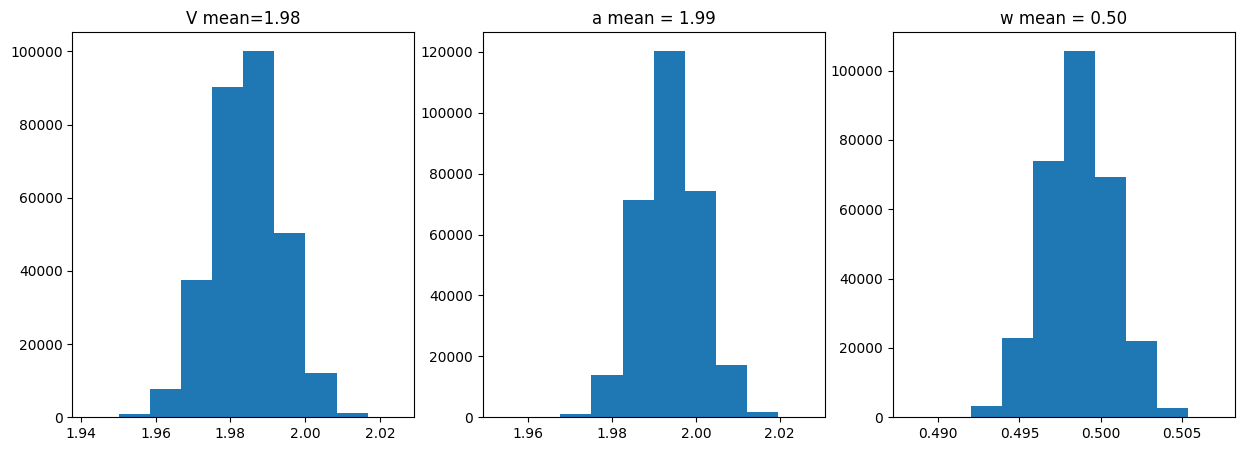

In [8]:
v_a_w, _ = vp.sample(int(3e5))
v_post = v_a_w[:,0];a_post = v_a_w[:,1];w_post = v_a_w[:,2]

plt.figure(figsize=(15, 5))
plt.subplot(1,3,1)
plt.hist(v_post);plt.title(f'V mean={np.mean(v_post):.2f}');
plt.subplot(1,3,2)
plt.hist(a_post);plt.title(f'a mean = {np.mean(a_post):.2f}');
plt.subplot(1,3,3)
plt.hist(w_post);plt.title(f'w mean = {np.mean(w_post):.2f}');


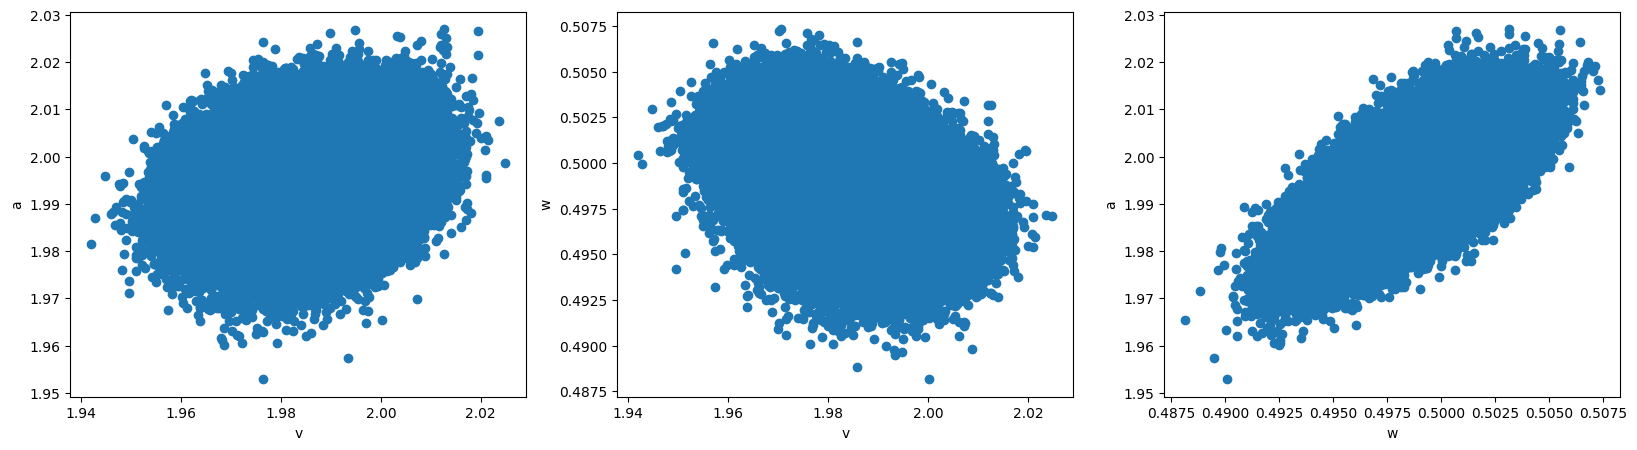

In [10]:
plt.figure(figsize=(20, 5))
plt.subplot(1,3,1)
plt.scatter(v_post, a_post);plt.xlabel('v');plt.ylabel('a');
plt.subplot(1,3,2)
plt.scatter(v_post, w_post);plt.xlabel('v');plt.ylabel('w');
plt.subplot(1,3,3)
plt.scatter(w_post, a_post);plt.xlabel('w');plt.ylabel('a');

# Another prior type:
v near to middle, a in middle bound, w in middle

In [ ]:
v = 0; a = 10
sim_data_to_files(v,a)
prior_bounds = { 'v_low': -5, 'v_high': 5, 'a_low': 0.01, 'a_high': 20, 'w_low': 0.1, 'w_high': 0.9 }
save_prior_bounds(prior_bounds)

lb = np.array([-5, 0.01, 0.1]); ub = np.array([5, 20, 0.9])
plb = np.array([-4, 5, 0.15]); pub = np.array([4, 15, 0.85])

x0 = np.array([np.random.uniform(plb[0], pub[0]), np.random.uniform(plb[1], pub[1]), np.random.uniform(plb[2], pub[2])])
vp, results = run_vbmc(x0, lb, ub, plb, pub)

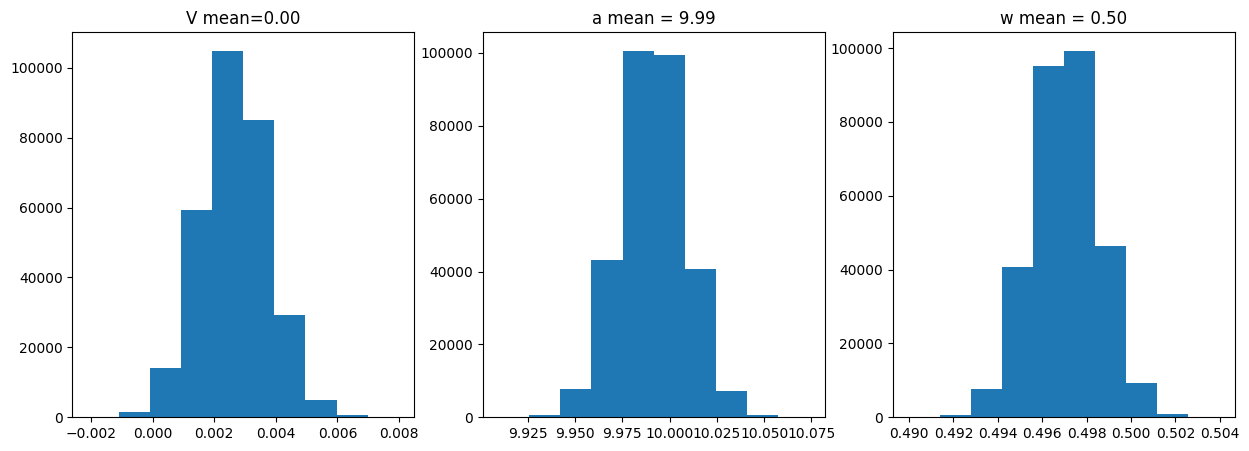

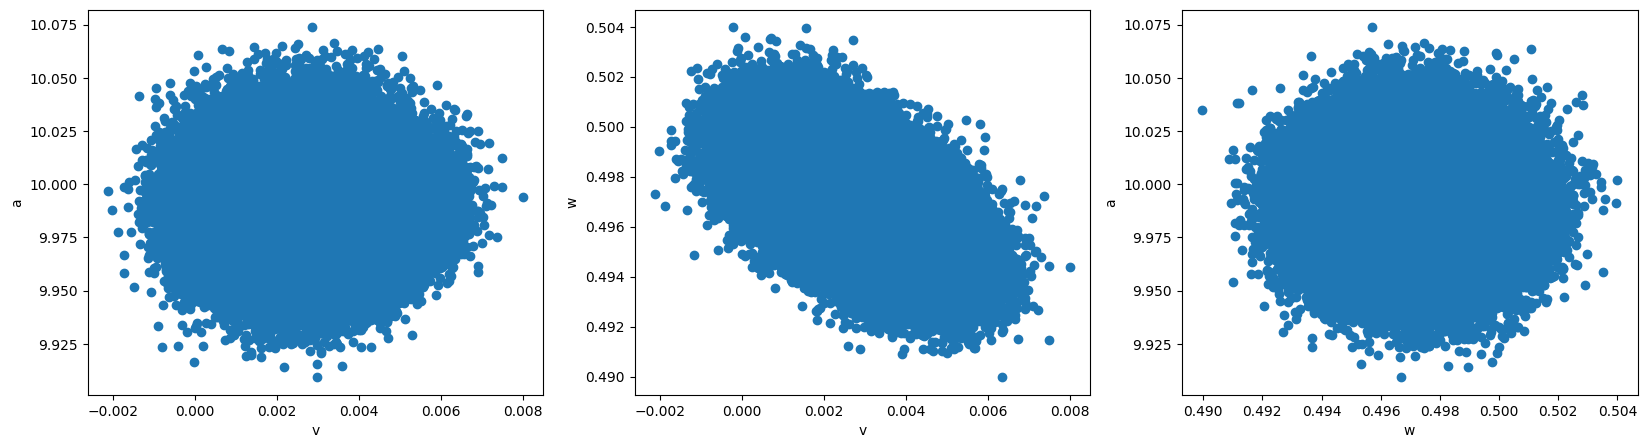

In [3]:
vbmc_plots(vp)